# 方案1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import miceforest as mf  #填补缺失值
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import os
import sklearn.metrics as metrics
# 绘图防止中文出错
sns.set(font="SimHei", font_scale=1.5)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

In [2]:
data = pd.read_excel(r'D:\data\联川\work3.xlsx')
data.shape, (data.isnull().sum(axis=0) /
             data.shape[0]).sort_values(ascending=False).head(30), data.columns

((83, 5946),
 Symbol      0.0
 ARID1B      0.0
 TOR1AIP2    0.0
 NBEA        0.0
 GPRC5A      0.0
 ENGASE      0.0
 REPS2       0.0
 NUP35       0.0
 NUP37       0.0
 NUP43       0.0
 FLAD1       0.0
 BOD1L1      0.0
 NUBPL       0.0
 USP32       0.0
 SYNE1       0.0
 DOCK8       0.0
 LPCAT1      0.0
 FBXO22      0.0
 VPS37A      0.0
 PPHLN1      0.0
 SPATA4      0.0
 NAV1        0.0
 TSTD1       0.0
 ABHD11      0.0
 CMAS        0.0
 TSPAN14     0.0
 SPATA20     0.0
 CXorf38     0.0
 NPLOC4      0.0
 SMARCC2     0.0
 dtype: float64,
 Index(['Symbol', 'NUDT4B', 'GATD3', 'PNMA6E', 'GNG5B', 'RBM47', 'UBA6',
        'ESYT2', 'SHTN1', 'PXDNL',
        ...
        'FCGBP', 'SCIN', 'DDX49', 'CAPN7', 'WASF2', 'ENPP4', 'ZHX2', 'MORC2',
        'SEC23IP', 'subtype'],
       dtype='object', length=5946))

In [3]:
over_x = data.drop(["Assay","Condition"],axis=1)
over_y = data["Condition"]
SXtrain, SXtest, SYtrain, SYtest = train_test_split(over_x,
                                                    over_y,
                                                    test_size=0.2,
                                                   random_state=420)

KeyError: "['Assay', 'Condition'] not found in axis"

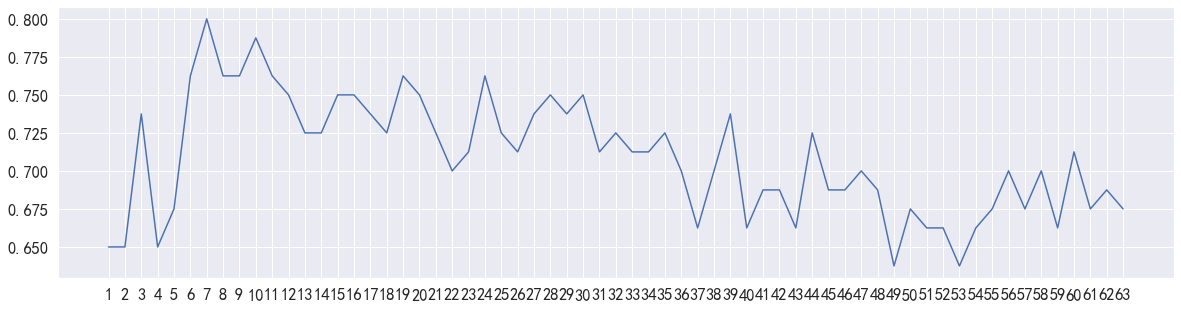

In [51]:
from sklearn.ensemble import RandomForestClassifier as RFC_  #分类器
from sklearn.feature_selection import RFE  #递归特征消除法
#X_wrapper = selector_RFE.transform(SXtrain)
rf=RFC_(random_state=420)
rf=rf.fit(SXtrain,SYtrain)
#cross_val_score(rf,X_wrapper,SYtrain,cv=5).mean()


score=[]
for i in range(1,64,1):
    X_wrapper = RFE(rf,n_features_to_select=i,step=1).fit_transform(SXtrain,SYtrain)
    once = cross_val_score(rf,X_wrapper,SYtrain,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,64,1),score)
plt.xticks(range(1,64,1));

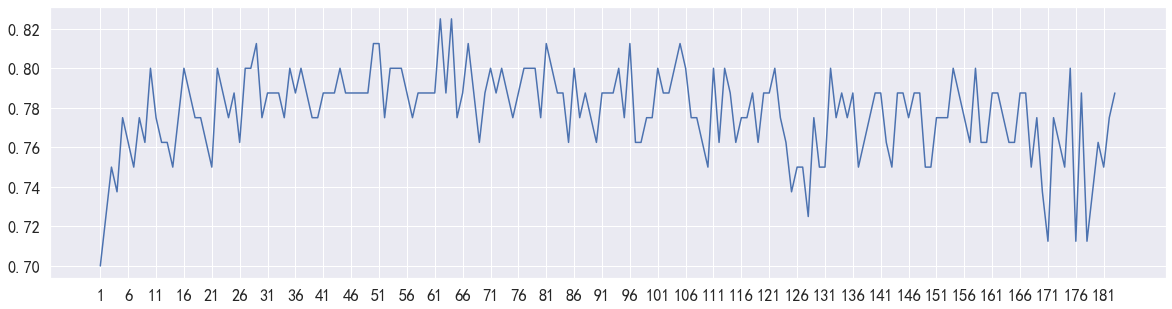

In [6]:
plt.figure(figsize=[20,5])
plt.plot(range(1,184,1),score)
plt.xticks(range(1,184,5));

In [4]:
#评估器为随机森林的递归特征选择法即包装法
from sklearn.ensemble import RandomForestClassifier as RFC_  #分类器
from sklearn.feature_selection import RFE  #递归特征消除法

rf=RFC_(random_state=420)
rf=rf.fit(SXtrain,SYtrain)

selector_RFE = RFE(rf,
                   n_features_to_select=7,
                   step=1
                  ).fit(SXtrain, SYtrain)


#over_x.columns[selector_RFE.get_support()]
SXtrain.columns[selector_RFE.get_support()]

Index(['NT-proBNP', 'OPG', 't-PA', 'SCGB3A2', 'TNF-R1', 'SERPINA5', 'REG1A'], dtype='object')

In [32]:
selector_RFE = RFE(rf,
                   n_features_to_select=14,
                   step=1
                  ).fit(SXtrain, SYtrain)
SXtrain.columns[selector_RFE.get_support()]

Index(['NT-proBNP', 'TNF-R2', 'TR', 'GDF-15', 'DLK-1', 'MB', 'SCGB3A2',
       'TNF-R1', 'SERPINA5', 'REG1A', 'PRSS2', 'CDH1', 'FAP', 'CRTAC1'],
      dtype='object')

In [49]:
selectX = data[['NT-proBNP', 'IL2-RA', 'OPG', 'MCP-1', 'GRN', 'PLC', 'CNTN1', 'TFPI',
       'TR', 'GDF-15', 'SELE', 'DLK-1', 'CXCL16', 'IL-6RA', 'IGFBP-1',
       'Ep-CAM', 'AP-N', 'FAS', 'MB', 'TNFSF13B', 'PRTN3', 'U-PAR', 'OPN',
       'CTSD', 'IL-1RT2', 'CCL15', 'ST2', 't-PA', 'SCGB3A2', 'COL1A1', 'MMP-3',
       'RARRES2', 'TNF-R1', 'IGFBP-2', 'NRP1', 'CST3', 'F11', 'PROC',
       'SERPINA5', 'ICAM1', 'REG1A', 'C2', 'CDH1', 'NID1', 'IL7R', 'IGFBP3',
       'CR2', 'TCN2', 'TNC', 'DPP4', 'ICAM3', 'TIE1', 'EFEMP1', 'GAS6', 'FCN2',
       'CCL14', 'VASN', 'LILRB2', 'LILRB1', 'OSMR', 'C1QTNF1', 'CFHR5',
       'CRTAC1', 'FETUB'
]]
selectY = data["Condition"]

SXtrain, SXtest, SYtrain, SYtest = train_test_split(selectX,
                                                selectY,
                                               test_size=0.2,
                                                random_state=42)

In [8]:
# 进行特征筛选
selectX = data[['NT-proBNP', 'TNF-R2', 'TR', 'GDF-15', 'DLK-1', 'MB', 'SCGB3A2',
       'TNF-R1', 'SERPINA5', 'REG1A', 'PRSS2', 'CDH1', 'FAP', 'CRTAC1']]
selectY = data["Condition"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(selectX,
                                                selectY,
                                               test_size=0.1,
                                                random_state=420)

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#import xgboost as xgb
from xgboost import XGBClassifier as XGBC

from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier(max_depth=5,min_child_weight=0.001,reg_lambda=1)#,reg_lambda=0.1,max_depth=13,objective="binary:logistic",min_child_weight=0.1
#max_depth=13,objective="binary:logistic",min_child_weight=0.1
XGB.fit(Xtrain,Ytrain) ##拟合模型

from sklearn.metrics import accuracy_score
train_score = accuracy_score(Ytrain,XGB.predict(Xtrain))
print('train_score',train_score)
test_score = accuracy_score(Ytest,XGB.predict(Xtest))
print('test_score',test_score)

test_predict4=XGB.predict(Xtest)

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score

conf = confusion_matrix(Ytest, test_predict4)
accuracy = (conf[0, 0] + conf[1, 1]) / (conf[0, 0] + conf[0, 1] + conf[1, 0] + conf[1, 1])
print('accuracy:',accuracy)
#accuracy.append(accuracy)
sensitivity = conf[1, 1] / (conf[1, 0] + conf[1, 1])
print('sensitivity:',sensitivity)
#特异度：
speciality = conf[0, 0] / (conf[0, 1] + conf[0, 0])
print('speciality:',speciality)
#F1分数：
F1_score = 2*conf[1, 1] / (2*conf[1, 1]+conf[1, 0] + conf[0, 1])
print('F1_score:',F1_score) 
#FDR：
FDR = conf[0, 1] / (conf[0, 1] + conf[1, 1])
print('FDR:',FDR)

score = XGB.predict_proba(Xtest)[:,1]
predict = XGB.predict(Xtest)
fpr,tpr,thres = roc_curve(Ytest,score)

print("AUC:",roc_auc_score(Ytest, score, average='macro', sample_weight=None))
print('Cross-entropy loss:',metrics.log_loss(Ytest, score))

#交叉验证
scores = cross_val_score(XGB,Xtrain,Ytrain,cv=10)
scores.mean()

train_score 1.0
test_score 0.9047619047619048
accuracy: 0.9047619047619048
sensitivity: 0.8333333333333334
speciality: 0.9333333333333333
F1_score: 0.8333333333333334
FDR: 0.16666666666666666
AUC: 0.9888888888888889
Cross-entropy loss: 0.19718822013653284


0.6347953216374269

C:\Users\C\AppData\Local\Temp\ipykernel_2200\137630339.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


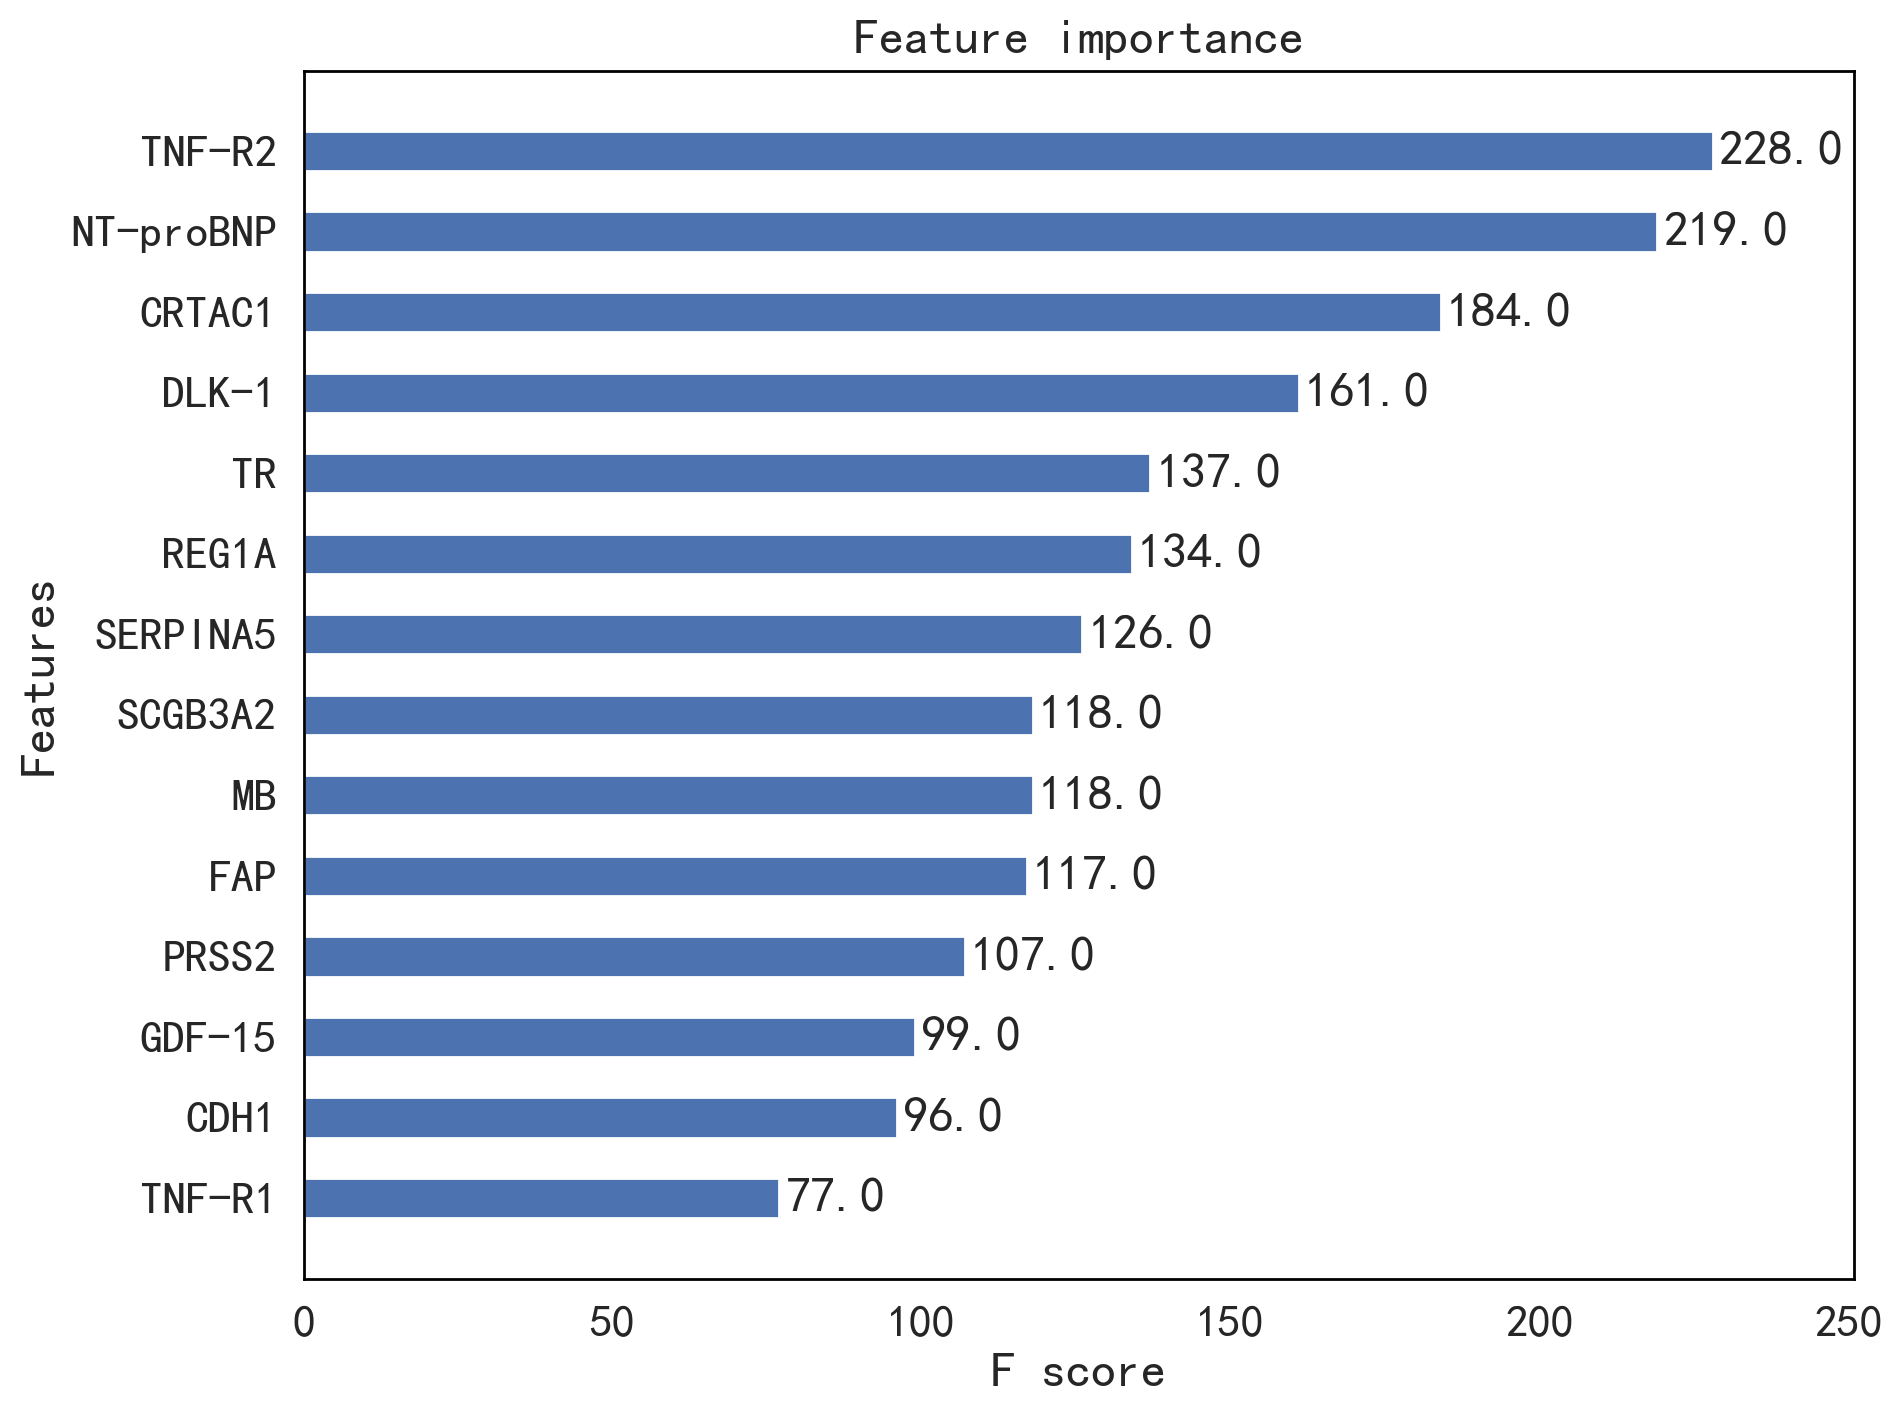

In [11]:
import xgboost as xgb
from xgboost import plot_importance
#fig,ax = plt.subplots(figsize=(10,8))
plt.figure(figsize=(10,8),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')


plot_importance(XGB,max_num_features=37,ax=ax,height=0.5);
plt.savefig(r'D:/data/FI1-3-1.jpg')

[0]	validation_0-error:0.13812	validation_0-logloss:0.56808	validation_1-error:0.19048	validation_1-logloss:0.59121
[1]	validation_0-error:0.11050	validation_0-logloss:0.49172	validation_1-error:0.14286	validation_1-logloss:0.53911
[2]	validation_0-error:0.07182	validation_0-logloss:0.41674	validation_1-error:0.09524	validation_1-logloss:0.45882
[3]	validation_0-error:0.06630	validation_0-logloss:0.36650	validation_1-error:0.09524	validation_1-logloss:0.41393
[4]	validation_0-error:0.03867	validation_0-logloss:0.31927	validation_1-error:0.04762	validation_1-logloss:0.37871
[5]	validation_0-error:0.03867	validation_0-logloss:0.28773	validation_1-error:0.04762	validation_1-logloss:0.37842
[6]	validation_0-error:0.03315	validation_0-logloss:0.25669	validation_1-error:0.04762	validation_1-logloss:0.34299
[7]	validation_0-error:0.02210	validation_0-logloss:0.23553	validation_1-error:0.09524	validation_1-logloss:0.33284
[8]	validation_0-error:0.01657	validation_0-logloss:0.21310	validation_1

[71]	validation_0-error:0.00000	validation_0-logloss:0.00861	validation_1-error:0.09524	validation_1-logloss:0.19029
[72]	validation_0-error:0.00000	validation_0-logloss:0.00845	validation_1-error:0.09524	validation_1-logloss:0.19034
[73]	validation_0-error:0.00000	validation_0-logloss:0.00826	validation_1-error:0.09524	validation_1-logloss:0.18949
[74]	validation_0-error:0.00000	validation_0-logloss:0.00810	validation_1-error:0.09524	validation_1-logloss:0.19056
[75]	validation_0-error:0.00000	validation_0-logloss:0.00792	validation_1-error:0.09524	validation_1-logloss:0.19213
[76]	validation_0-error:0.00000	validation_0-logloss:0.00773	validation_1-error:0.09524	validation_1-logloss:0.19399
[77]	validation_0-error:0.00000	validation_0-logloss:0.00761	validation_1-error:0.09524	validation_1-logloss:0.19369
[78]	validation_0-error:0.00000	validation_0-logloss:0.00747	validation_1-error:0.09524	validation_1-logloss:0.19253
[79]	validation_0-error:0.00000	validation_0-logloss:0.00729	val

C:\Users\C\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\C\AppData\Local\Temp\ipykernel_2200\2534796930.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


Accuracy: 90.48%


C:\Users\C\AppData\Local\Temp\ipykernel_2200\2534796930.py:64: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


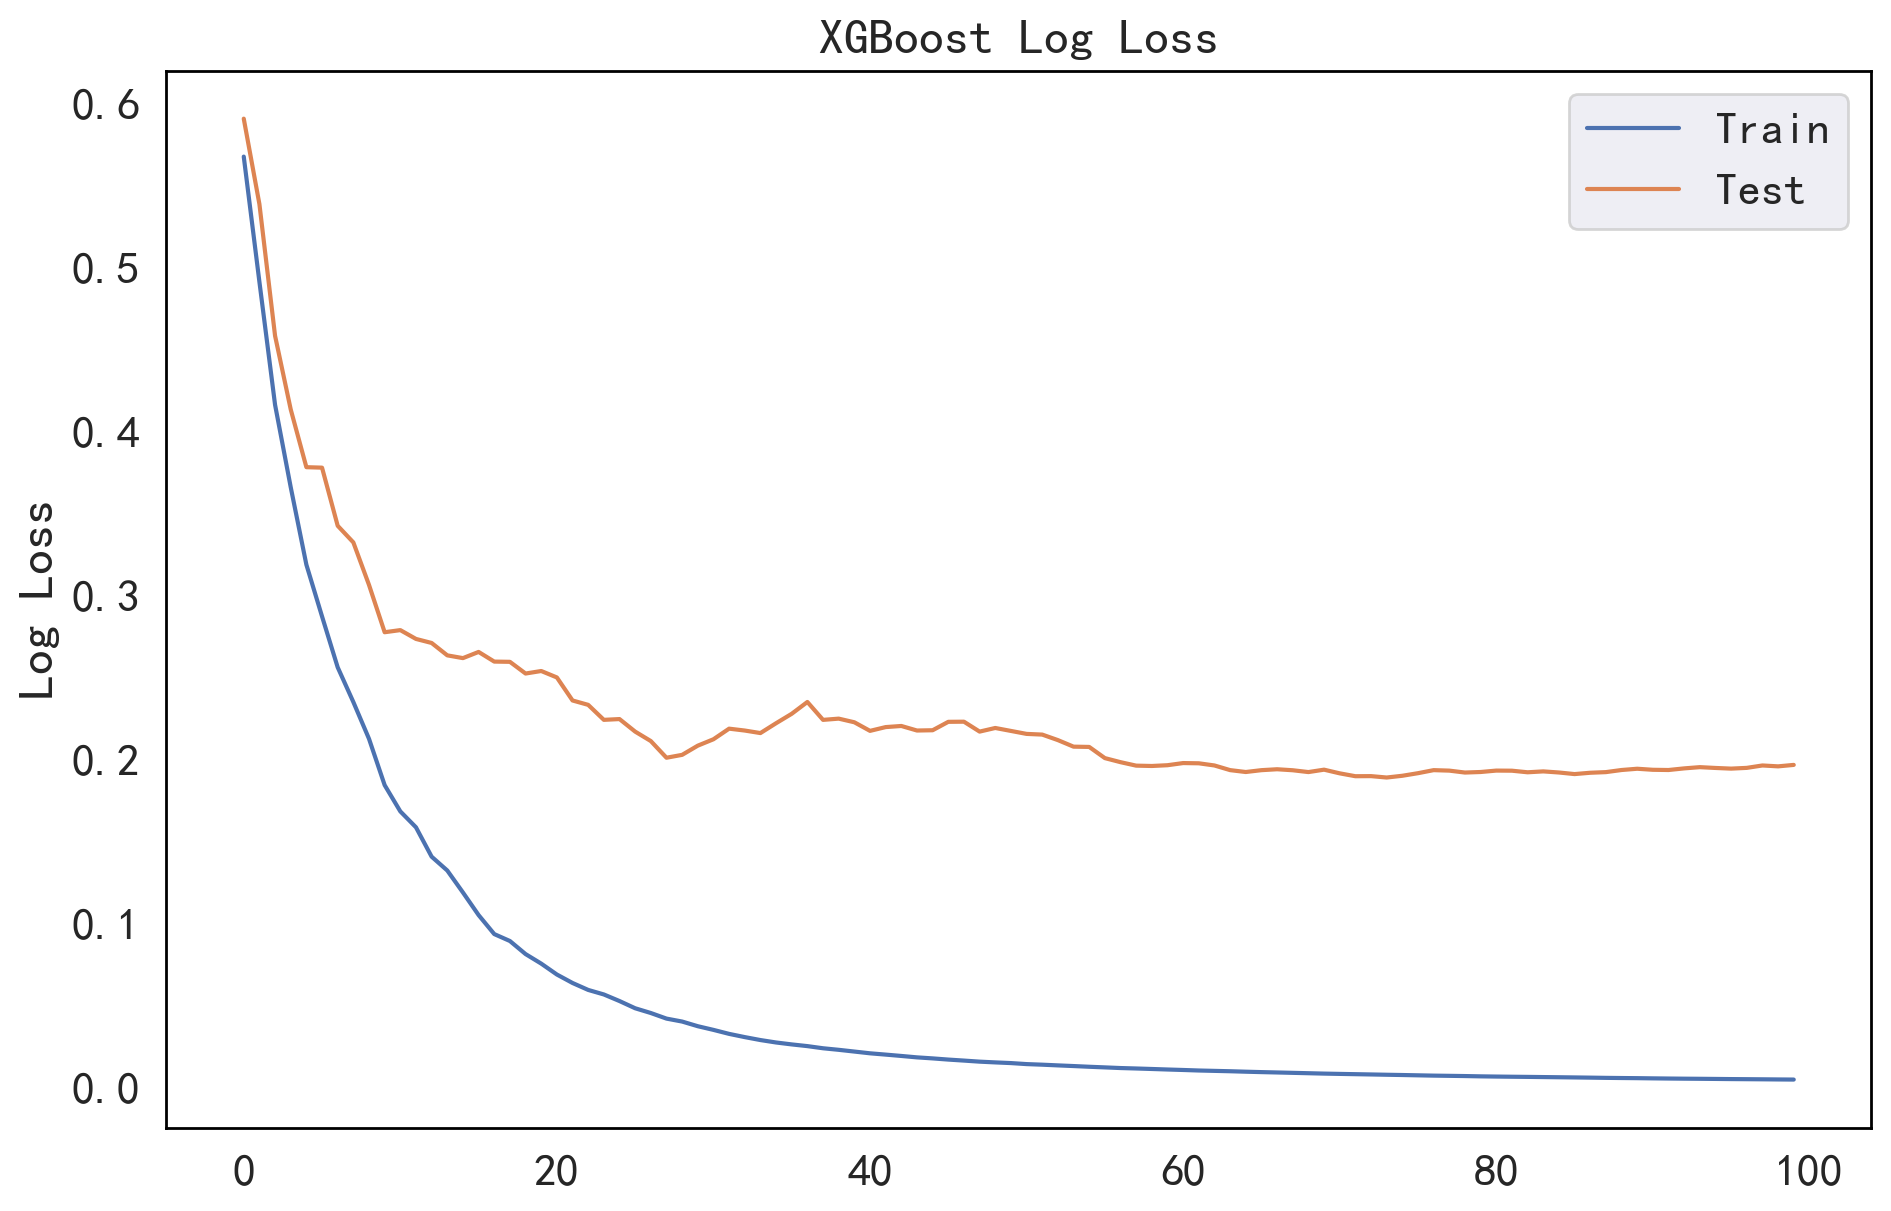

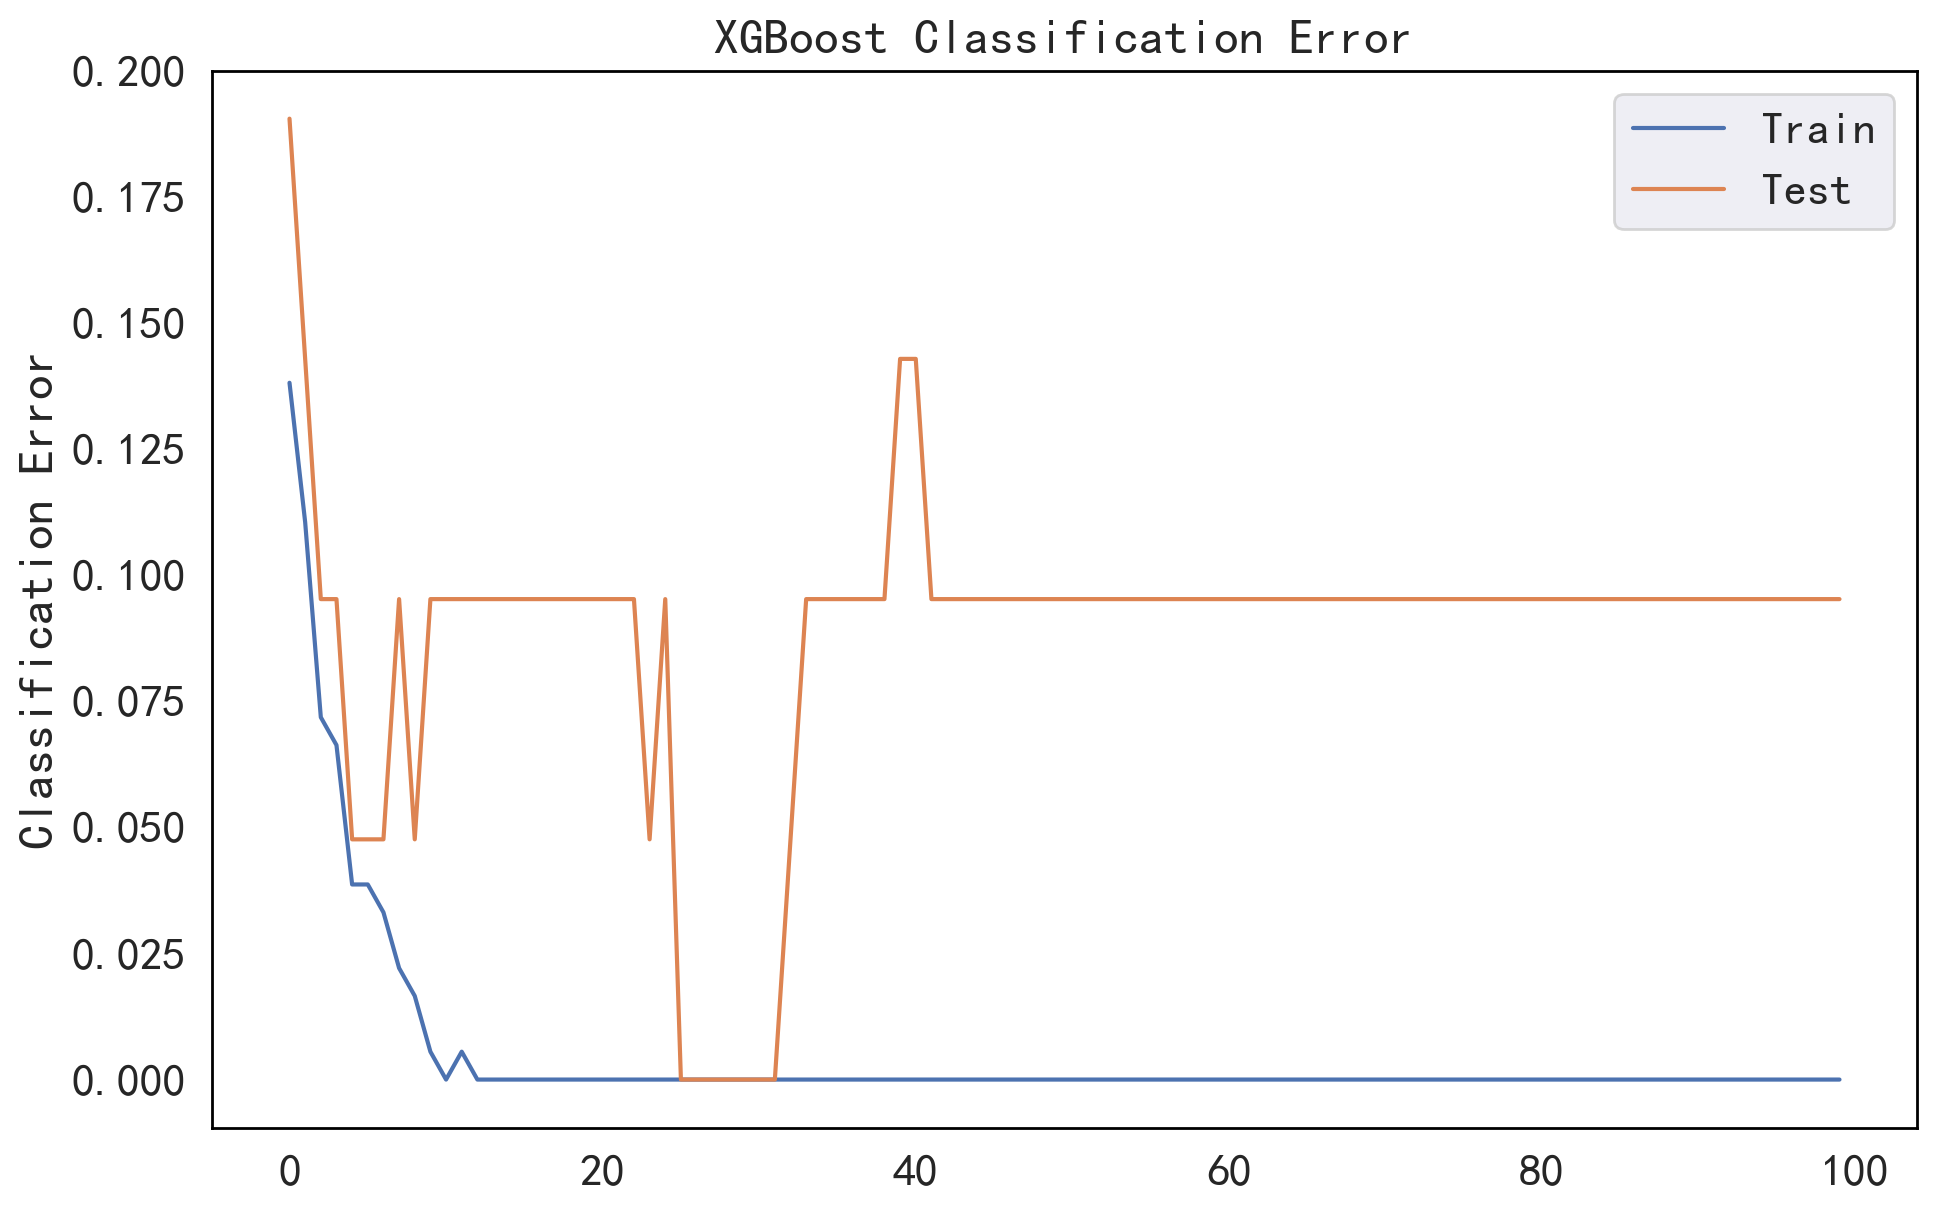

In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = data
# split data into X and y
X= dataset.drop(["Condition","Assay"],axis=1)
Y = dataset["Condition"]
# split data into train and test sets

X = dataset[['NT-proBNP', 'TNF-R2', 'TR', 'GDF-15', 'DLK-1', 'MB', 'SCGB3A2',
       'TNF-R1', 'SERPINA5', 'REG1A', 'PRSS2', 'CDH1', 'FAP', 'CRTAC1'
]]
Y = dataset["Condition"]
 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                Y,
                                               test_size=0.1,
                                                random_state=420)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier(max_depth=5,min_child_weight=0.001,reg_lambda=1)#reg_lambda=0.1,max_depth=13,objective="binary:logistic",min_child_weight=0.1
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig=plt.figure(figsize=(11,7),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')


#fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
plt.grid(True)
#pyplot.show()
pyplot.savefig(r'D:/data/联川/xuexi1-3-3.jpg')

# plot classification error
#fig, ax = pyplot.subplots()
fig=plt.figure(figsize=(11,7),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')


ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error');
#pyplot.show()
pyplot.savefig(r'D:/data/联川/xuexi1-3-4.jpg')

Text(0.5, 0, 'Top 37 Features')

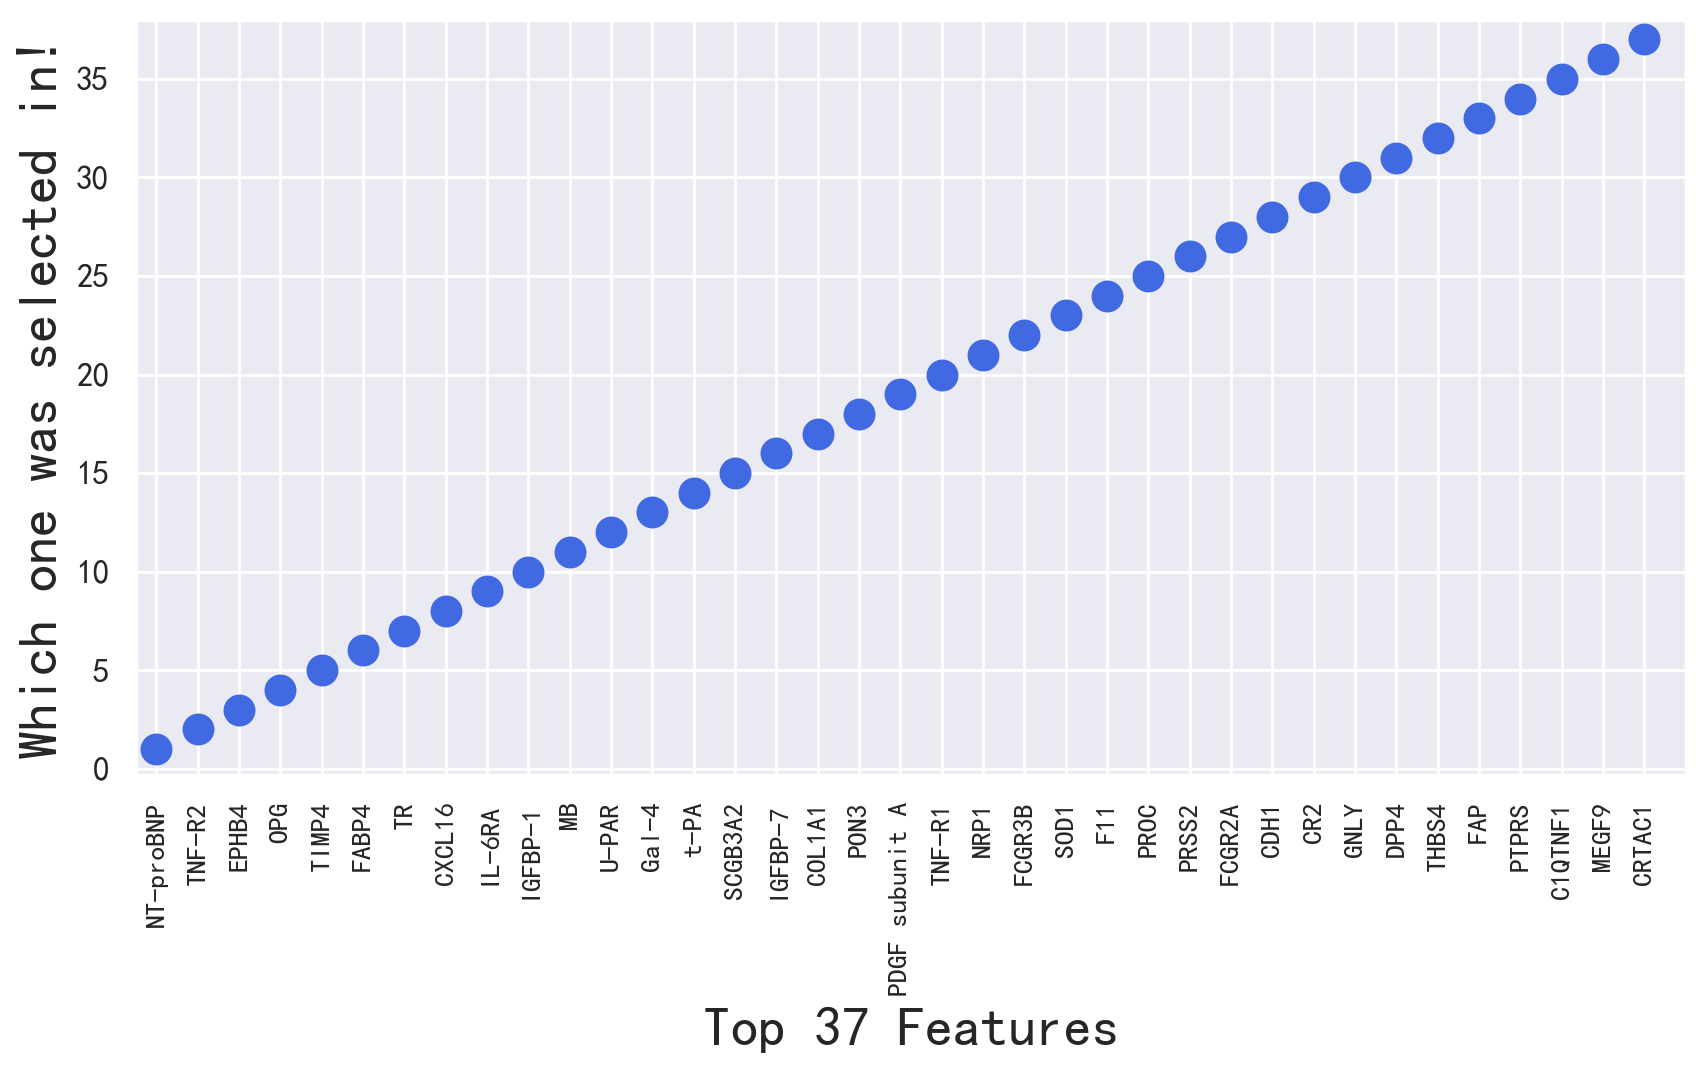

In [37]:
X=[ 'NT-proBNP', 'TNF-R2', 'EPHB4', 'OPG', 'TIMP4', 'FABP4', 'TR', 'CXCL16',
       'IL-6RA', 'IGFBP-1', 'MB', 'U-PAR', 'Gal-4', 't-PA', 'SCGB3A2',
       'IGFBP-7', 'COL1A1', 'PON3', 'PDGF subunit A', 'TNF-R1', 'NRP1',
       'FCGR3B', 'SOD1', 'F11', 'PROC', 'PRSS2', 'FCGR2A', 'CDH1', 'CR2',
       'GNLY', 'DPP4', 'THBS4', 'FAP', 'PTPRS', 'C1QTNF1', 'MEGF9', 'CRTAC1']
Y=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]

plt.figure(figsize=(10,5)     # 图像的尺寸（长，宽）
          ,dpi=200             # 图像分辨率
          ,facecolor='w'      # 图像的背景颜色，设置为白色，默认也是白色
          ,edgecolor='k'      # 图像的边框颜色，设置为黑色，默认也是黑色
          )

plt.scatter(X,Y,s=110,c='royalblue')
plt.rcParams['font.sans-serif'] = ['Arial']   # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题
plt.gca().set(xlim=(-0.5,37),ylim=(-0.3,38))       # plt.gca()表示如果有现在的图存在,获取现在的图，set（横坐标取0-30，纵坐标取0-3.3）控制横纵坐标的范围
plt.xticks(rotation=90,fontsize=10)                      # 坐标轴上的标尺的字的大小 
plt.yticks(fontsize=12)
plt.ylabel("Which one was selected in!",fontsize=20)                 # 坐标轴上的标题和字体大小
plt.xlabel("Top 37 Features",fontsize=20)
#plt.title("",fontsize=20)      # 整个图像的标题和字体的大小
# 让图形显示
#plt.show()
#plt.savefig(r'D:/data/联川/散点.jpg')

# 方案二

In [13]:
over_x = data.drop(["Condition","Assay"],axis=1)
over_y = data["Condition"]
SXtrain, SXtest, SYtrain, SYtest = train_test_split(over_x,
                                                    over_y,
                                                    test_size=0.2,
                                                   random_state=42)

In [14]:
Xtrain2=SXtrain
Ytrain2=SYtrain
Xtest2=SXtest
Ytest2=SYtest

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#import xgboost as xgb
from xgboost import XGBClassifier as XGBC

from xgboost.sklearn import XGBClassifier
XGB2 = XGBClassifier(max_depth=6,min_child_weight=1,reg_lambda=0.01)#objective="binary:logistic",max_depth=13,reg_lambda=0,reg_alpha=0,min_child_weight=0.0001

XGB2.fit(Xtrain2,Ytrain2) ##拟合模型

from sklearn.metrics import accuracy_score
train_score = accuracy_score(Ytrain2,XGB2.predict(Xtrain2))
print('train_score',train_score)
test_score = accuracy_score(Ytest2,XGB2.predict(Xtest2))
print('test_score',test_score)

test_predict4=XGB2.predict(Xtest2)

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score

conf = confusion_matrix(Ytest2, test_predict4)
accuracy = (conf[0, 0] + conf[1, 1]) / (conf[0, 0] + conf[0, 1] + conf[1, 0] + conf[1, 1])
print('accuracy:',accuracy)
#accuracy.append(accuracy)
sensitivity = conf[1, 1] / (conf[1, 0] + conf[1, 1])
print('sensitivity:',sensitivity)
#特异度：
speciality = conf[0, 0] / (conf[0, 1] + conf[0, 0])
print('speciality:',speciality)
#F1分数：
F1_score = 2*conf[1, 1] / (2*conf[1, 1]+conf[1, 0] + conf[0, 1])
print('F1_score:',F1_score) 
#FDR：
FDR = conf[0, 1] / (conf[0, 1] + conf[1, 1])
print('FDR:',FDR)

score = XGB2.predict_proba(Xtest2)[:,1]
predict = XGB2.predict(Xtest2)
fpr,tpr,thres = roc_curve(Ytest2,score)

print("AUC:",roc_auc_score(Ytest2, score, average='macro', sample_weight=None))
print('Cross-entropy loss:',metrics.log_loss(Ytest2, score))

#交叉验证
scores = cross_val_score(XGB2,Xtrain2,Ytrain2,cv=10)
scores.mean()

train_score 1.0
test_score 0.7317073170731707
accuracy: 0.7317073170731707
sensitivity: 0.8421052631578947
speciality: 0.6363636363636364
F1_score: 0.7441860465116279
FDR: 0.3333333333333333
AUC: 0.7440191387559809
Cross-entropy loss: 0.8190792194331951


0.5529411764705883

In [56]:
XGB2.score(Xtest2,Ytest2),sorted([*zip(Xtrain2.columns,XGB2.feature_importances_.ravel())],key=lambda s:abs(s[1]),reverse=True)

(0.7,
 [('SCGB3A2', 0.10381449),
  ('CPA1', 0.09154419),
  ('FAS', 0.07796553),
  ('CES1', 0.06911596),
  ('AXL', 0.06660482),
  ('PSP-D', 0.06532728),
  ('IGFBP-1', 0.058109306),
  ('IGFBP-2', 0.056953076),
  ('ICAM-2', 0.05417555),
  ('GRN', 0.037464224),
  ('LDL receptor', 0.033898942),
  ('RETN', 0.03208748),
  ('NT-proBNP', 0.028919324),
  ('EFEMP1', 0.022620877),
  ('MMP-3', 0.020780314),
  ('CNTN1', 0.018512534),
  ('TNF-R2', 0.01680398),
  ('TNF-R1', 0.01187999),
  ('PGLYRP1', 0.011247185),
  ('IL-18BP', 0.010632802),
  ('FCN2', 0.010401969),
  ('SELL', 0.008800334),
  ('CST3', 0.007828904),
  ('PI3', 0.007287225),
  ('CCL15', 0.006023014),
  ('PRTN3', 0.0056557124),
  ('IL-1RT1', 0.005011843),
  ('ITGB2', 0.003929895),
  ('CA1', 0.0039229305),
  ('TNFSF13B', 0.0037437656),
  ('CD163', 0.003723066),
  ('TR', 0.0035648542),
  ('SELE', 0.0030457466),
  ('UMOD', 0.0026128255),
  ('IL-6RA', 0.0025682433),
  ('TR-AP', 0.0022521573),
  ('FABP4', 0.0021809544),
  ('PRSS2', 0.002179156

# 方案三

In [16]:
from sklearn.ensemble import RandomForestClassifier as RFC_  #分类器

rf=RFC_(random_state=42)
rf=rf.fit(SXtrain,SYtrain)

sorted([*zip(over_x.columns,rf.feature_importances_.ravel())],key=lambda s:abs(s[1]),reverse=True)

[('TR', 0.021021093125847858),
 ('SCGB3A2', 0.02095687871450908),
 ('MB', 0.017341873158416087),
 ('TNF-R1', 0.017293503847500172),
 ('GDF-15', 0.016065918976809188),
 ('SELE', 0.01432842524664063),
 ('F7', 0.011759552785443548),
 ('NRP1', 0.010970910545860713),
 ('ST6GAL1', 0.010075461119347444),
 ('IGFBP-1', 0.010065179566644798),
 ('PROC', 0.009950030429997224),
 ('TR-AP', 0.00994059359228433),
 ('CRTAC1', 0.009901993966480536),
 ('PAI', 0.009496863321192645),
 ('t-PA', 0.00941716097246036),
 ('CXCL16', 0.009334532550018336),
 ('ST2', 0.009028743168344767),
 ('LILRB5', 0.008916601813613131),
 ('NT-proBNP', 0.008693877644104077),
 ('IGFBP3', 0.008674027377642226),
 ('NCAM1', 0.008311623973161484),
 ('PRSS2', 0.008125111578984746),
 ('CD59', 0.008023236131653174),
 ('ENG', 0.007934696963702753),
 ('EPHB4', 0.007892544164037108),
 ('DPP4', 0.00782155950818658),
 ('U-PAR', 0.007813290783033097),
 ('TNXB', 0.007613854573448816),
 ('MCP-1', 0.007551664219846357),
 ('FABP4', 0.007476576631

In [19]:
selectX1 = data[['TR',
 'SCGB3A2',
 'MB', 
 'TNF-R1', 
 'GDF-15', 
 'SELE', 
 'F7', 
 'NRP1', 
 'ST6GAL1', 
 'IGFBP-1', 
 'PROC', 
 'TR-AP', 
 'CRTAC1', 
 'PAI', 
 't-PA', 
 'CXCL16', 
 'ST2', 
 'LILRB5', 
 'NT-proBNP', 

]]
selectY1 = data["Condition"]

Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(selectX1,
                                                selectY1,
                                               test_size=0.2,
                                                random_state=420)

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#import xgboost as xgb
from xgboost import XGBClassifier as XGBC

from xgboost.sklearn import XGBClassifier
XGB1 = XGBClassifier(max_depth=7,min_child_weight=0.1)#objective="binary:logistic",

XGB1.fit(Xtrain1,Ytrain1) ##拟合模型

from sklearn.metrics import accuracy_score
train_score = accuracy_score(Ytrain1,XGB1.predict(Xtrain1))
print('train_score',train_score)
test_score = accuracy_score(Ytest1,XGB1.predict(Xtest1))
print('test_score',test_score)

test_predict4=XGB1.predict(Xtest1)

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score

conf = confusion_matrix(Ytest1, test_predict4)
accuracy = (conf[0, 0] + conf[1, 1]) / (conf[0, 0] + conf[0, 1] + conf[1, 0] + conf[1, 1])
print('accuracy:',accuracy)
#accuracy.append(accuracy)
sensitivity = conf[1, 1] / (conf[1, 0] + conf[1, 1])
print('sensitivity:',sensitivity)
#特异度：
speciality = conf[0, 0] / (conf[0, 1] + conf[0, 0])
print('speciality:',speciality)
#F1分数：
F1_score = 2*conf[1, 1] / (2*conf[1, 1]+conf[1, 0] + conf[0, 1])
print('F1_score:',F1_score) 
#FDR：
FDR = conf[0, 1] / (conf[0, 1] + conf[1, 1])
print('FDR:',FDR)

score = XGB1.predict_proba(Xtest1)[:,1]
predict = XGB1.predict(Xtest1)
fpr,tpr,thres = roc_curve(Ytest1,score)

print("AUC:",roc_auc_score(Ytest1, score, average='macro', sample_weight=None))
print('Cross-entropy loss:',metrics.log_loss(Ytest1, score))

#交叉验证
scores = cross_val_score(XGB1,Xtrain1,Ytrain1,cv=10)
scores.mean()

train_score 1.0
test_score 0.7804878048780488
accuracy: 0.7804878048780488
sensitivity: 0.875
speciality: 0.72
F1_score: 0.7567567567567568
FDR: 0.3333333333333333
AUC: 0.895
Cross-entropy loss: 0.5925630534581681


0.6345588235294117

# ROC曲线

C:\Users\C\AppData\Local\Temp\ipykernel_2200\1316068879.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


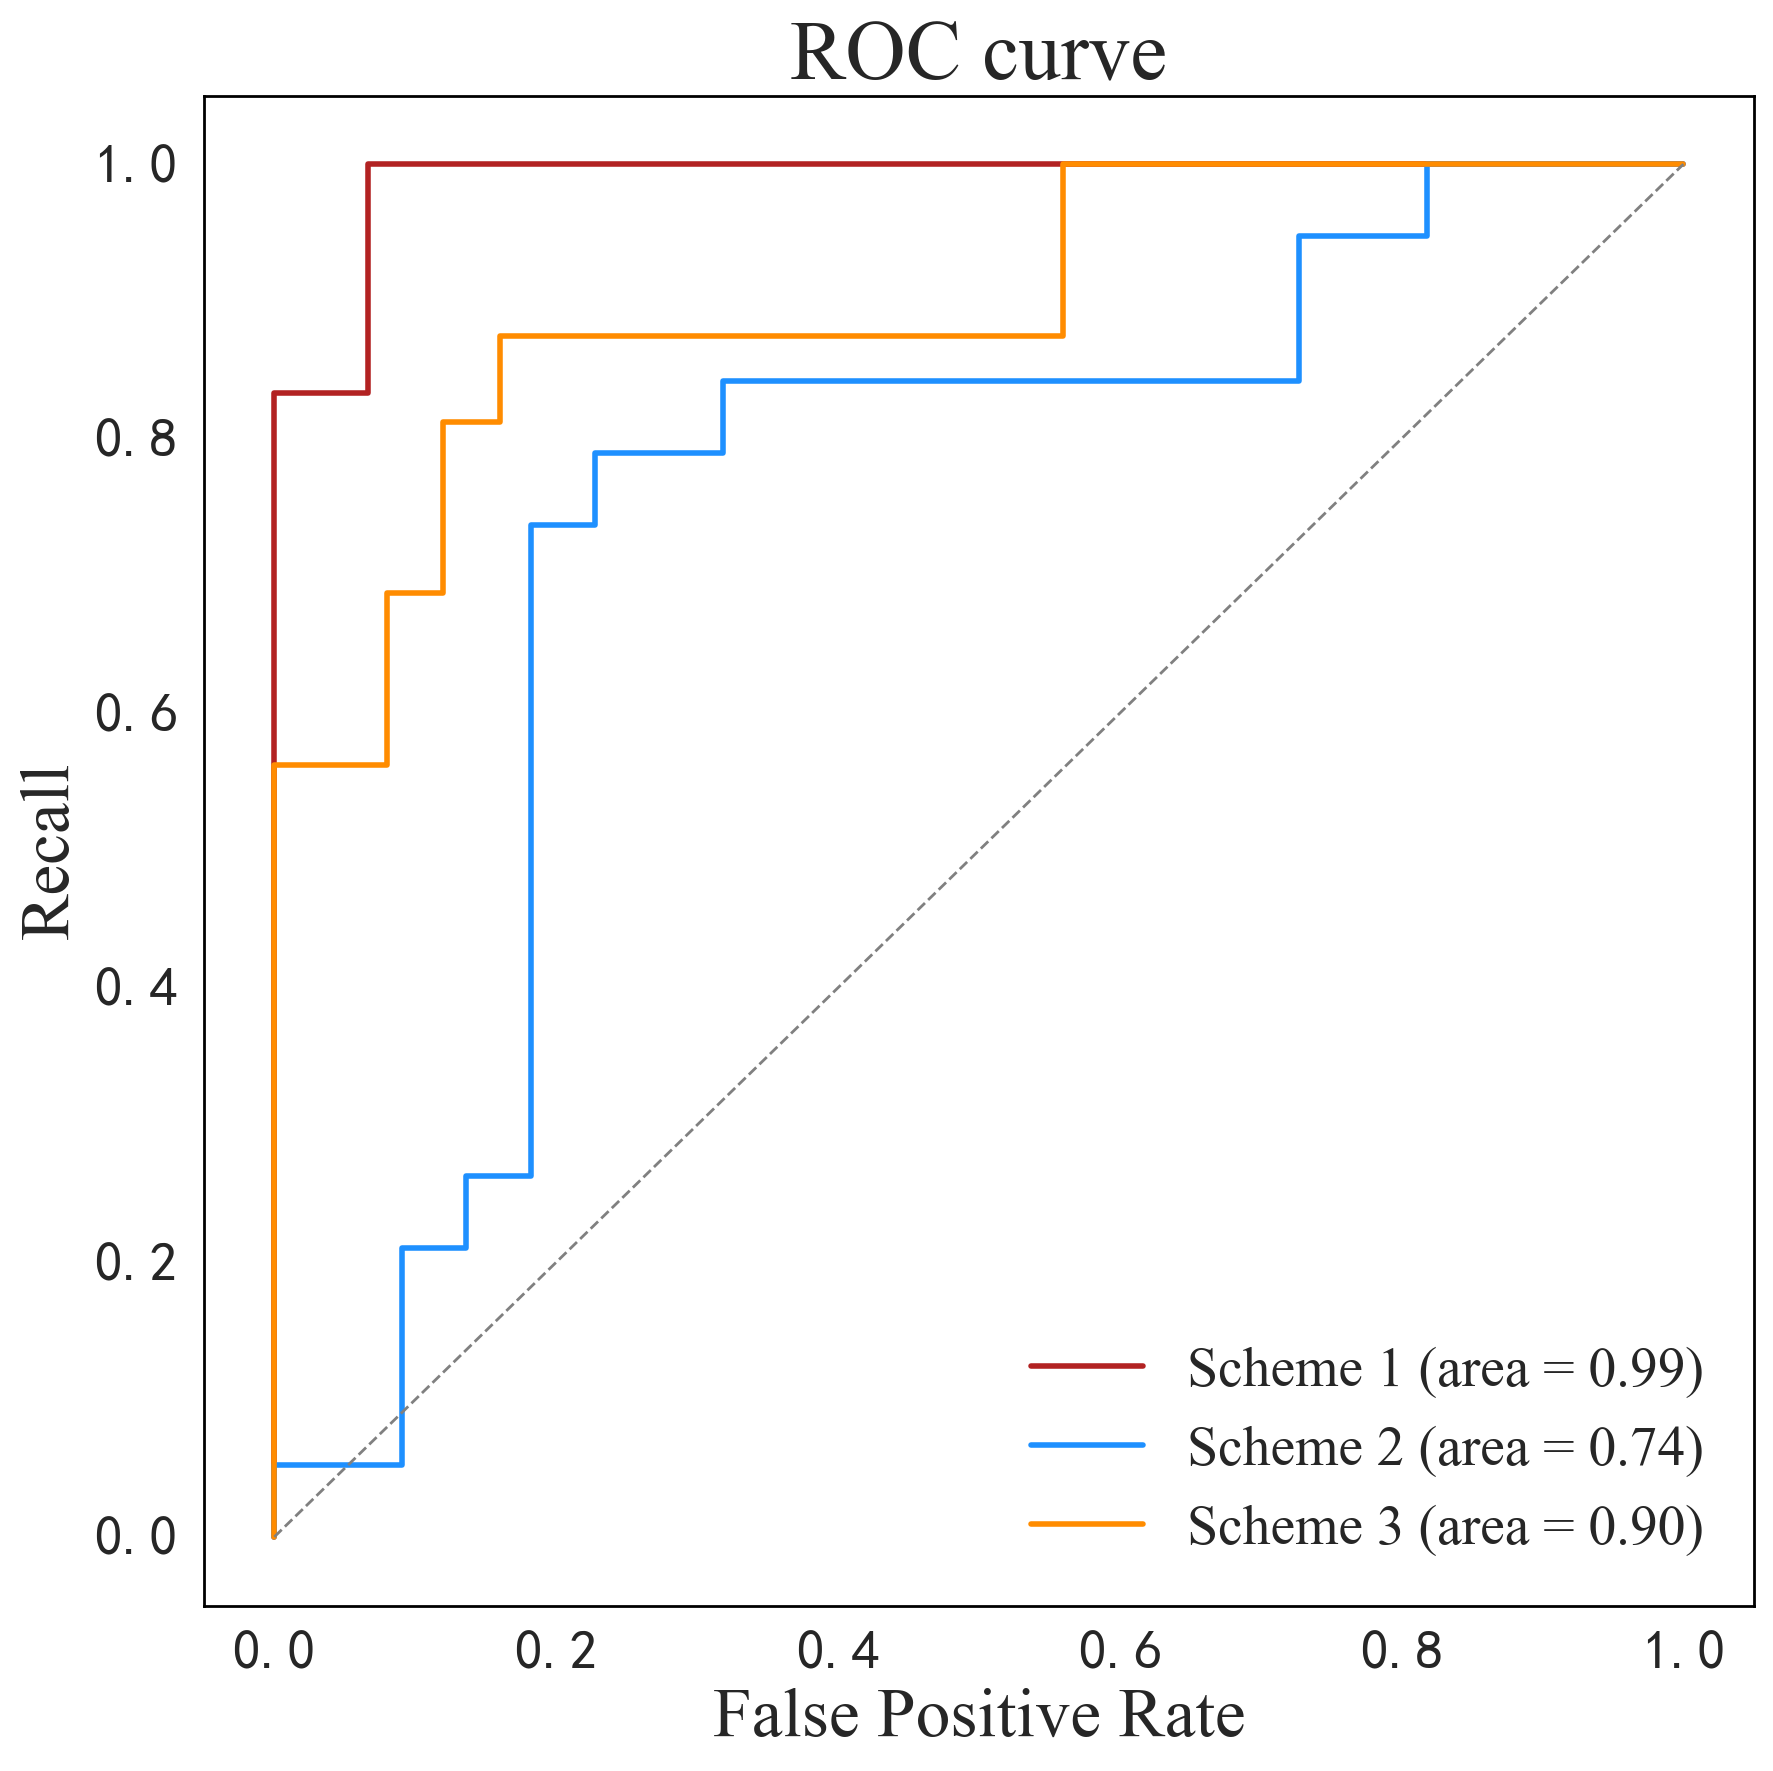

In [21]:
# 绘图防止中文出错
sns.set(font="SimHei", font_scale=1.5)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

from sklearn.metrics import roc_curve
FPR,recall,thresholds=roc_curve(Ytest,XGB.predict_proba(Xtest)[:,1],pos_label=1)
FPR2,recall2,thresholds2=roc_curve(Ytest2,XGB2.predict_proba(Xtest2)[:,1],pos_label=1)
FPR1,recall1,thresholds1=roc_curve(Ytest1,XGB1.predict_proba(Xtest1)[:,1],pos_label=1)


from sklearn.metrics import roc_auc_score as auc
area=auc(Ytest,XGB.predict_proba(Xtest)[:,1])
area2=auc(Ytest2,XGB2.predict_proba(Xtest2)[:,1])
area1=auc(Ytest1,XGB1.predict_proba(Xtest1)[:,1])




fig=plt.figure(figsize=(10,10),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')



plt.plot(FPR, recall, color='firebrick',
         label='Scheme 1 (area = %0.2f)'% area  ,linewidth=2.0)
plt.plot(FPR2, recall2, color='dodgerblue',
         label='Scheme 2 (area = %0.2f)'% area2 ,linewidth=2.0)
plt.plot(FPR1, recall1, color='darkorange',
         label='Scheme 3 (area = %0.2f)'% area1 ,linewidth=2.0)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--' ,linewidth=1.0)

font={'family':'Times New Roman', 
      'weight':'normal',
      'size':25
     }
font1={'family':'Times New Roman', 
      'weight':'normal',
      'size':20
     }
plt.gca().set(xlim=(-0.05,1.05),ylim=(-0.05,1.05))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=20)                      # 坐标轴上的标尺的字的大小 
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('Recall',fontdict=font)
plt.title('ROC curve',fontdict={'family':'Times New Roman',  'weight':'normal', 'size':30})
plt.legend(loc="lower right",prop = font1,facecolor='w',edgecolor='w');
#plt.grid(True,color='black',linestyle='--',alpha=0.1);
plt.savefig(r'D:/data/联川/ROC方案1-5.jpg')

# 单因素ROC曲线

C:\Users\C\AppData\Local\Temp\ipykernel_19700\2007931321.py:98: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(facecolor='w')


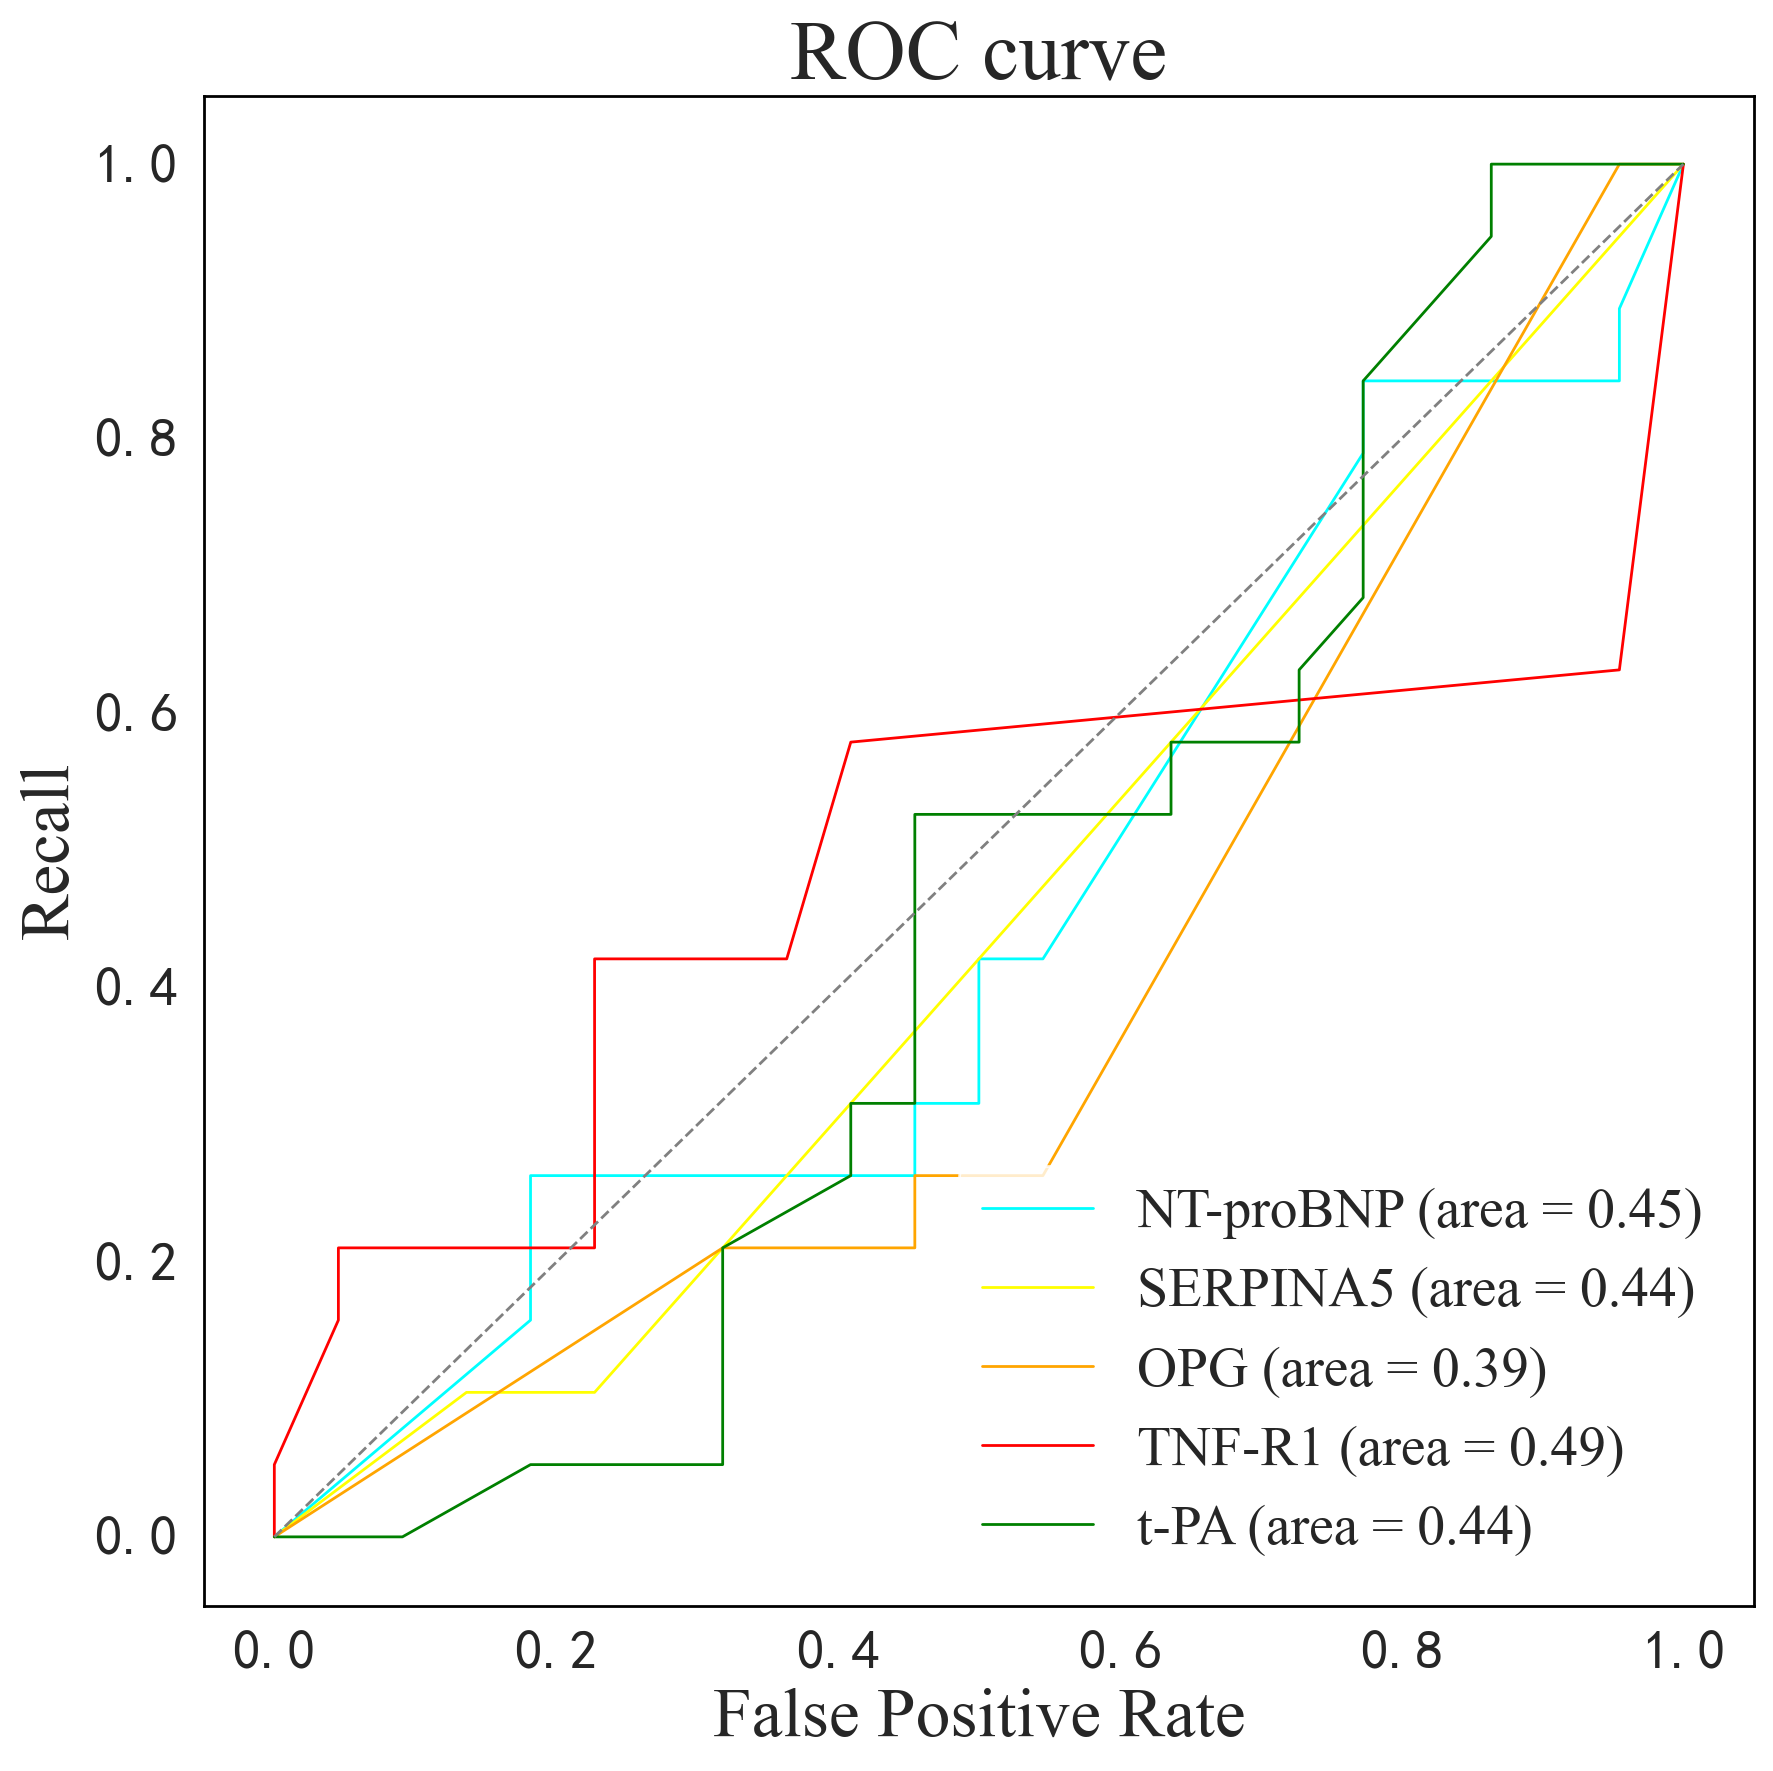

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import miceforest as mf  #填补缺失值
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import os
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier as XGBC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as auc
# 绘图防止中文出错
sns.set(font="SimHei", font_scale=1.5)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False
data = pd.read_excel(r'D:/data/联川/work1-3.xlsx')



# 进行特征筛选
selectX1 = data["NT-proBNP"]
selectX2 = data["SERPINA5"]
selectX3 = data["OPG"]
selectX4 = data["TNF-R1"]
selectX5 = data["t-PA"]
selectY1 = data["Condition"]
selectY2 = data["Condition"]
selectY3 = data["Condition"]
selectY4 = data["Condition"]
selectY5 = data["Condition"]


Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(selectX1,
                                                selectY1,
                                               test_size=0.2,
                                                random_state=42)
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(selectX2,
                                                selectY2,
                                               test_size=0.2,
                                                random_state=42)
Xtrain3, Xtest3, Ytrain3, Ytest3 = train_test_split(selectX3,
                                                selectY3,
                                               test_size=0.2,
                                                random_state=42)
Xtrain4, Xtest4, Ytrain4, Ytest4 = train_test_split(selectX4,
                                                selectY4,
                                               test_size=0.2,
                                                random_state=42)
Xtrain5, Xtest5, Ytrain5, Ytest5 = train_test_split(selectX5,
                                                selectY5,
                                               test_size=0.2,
                                                random_state=42)




XGB = XGBClassifier(max_depth=13,reg_lambda=0.1,objective="binary:logistic",min_child_weight=0.0001)#max_depth=13,reg_lambda=0.1,objective="binary:logistic",min_child_weight=0.0001
XGB1=XGB.fit(Xtrain1,Ytrain1) 
XGB2=XGB.fit(Xtrain2,Ytrain2)
XGB3=XGB.fit(Xtrain3,Ytrain3)
XGB4=XGB.fit(Xtrain4,Ytrain4)
XGB5=XGB.fit(Xtrain5,Ytrain5)

#score1=XGB1.predict_proba(Xtest1)[:,1]
#score2=XGB2.predict_proba(Xtest2)[:,1]
#score3=XGB3.predict_proba(Xtest3)[:,1]
#score4=XGB4.predict_proba(Xtest4)[:,1]
#score5=XGB5.predict_proba(Xtest5)[:,1]



#fpr,tpr,thres = roc_curve(Ytest1,score1)


FPR1,recall1,thresholds1=roc_curve(Ytest1,XGB.predict_proba(Xtest1)[:,1],pos_label=1)
FPR2,recall2,thresholds2=roc_curve(Ytest2,XGB.predict_proba(Xtest2)[:,1],pos_label=1)
FPR3,recall3,thresholds3=roc_curve(Ytest3,XGB.predict_proba(Xtest3)[:,1],pos_label=1)
FPR4,recall4,thresholds4=roc_curve(Ytest4,XGB.predict_proba(Xtest4)[:,1],pos_label=1)
FPR5,recall5,thresholds5=roc_curve(Ytest5,XGB.predict_proba(Xtest5)[:,1],pos_label=1)

area1=auc(Ytest1,XGB1.predict_proba(Xtest1)[:,1])
area2=auc(Ytest2,XGB2.predict_proba(Xtest2)[:,1])
area3=auc(Ytest3,XGB3.predict_proba(Xtest3)[:,1])
area4=auc(Ytest4,XGB4.predict_proba(Xtest4)[:,1])
area5=auc(Ytest5,XGB5.predict_proba(Xtest5)[:,1])


fig=plt.figure(figsize=(10,10),dpi=200)
ax=plt.gca(facecolor='w')
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('1.0')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('1.0')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('1.0')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('1.0')




plt.plot(FPR1, recall1, color='cyan',
         label='NT-proBNP (area = %0.2f)'% area1 ,linewidth=1.0)
plt.plot(FPR2, recall2, color='yellow',
         label='SERPINA5 (area = %0.2f)'% area2 ,linewidth=1.0)
plt.plot(FPR3, recall3, color='orange',
         label='OPG (area = %0.2f)'% area3 ,linewidth=1.0)
plt.plot(FPR4, recall4, color='red',
         label='TNF-R1 (area = %0.2f)'% area4  ,linewidth=1.0)
plt.plot(FPR5, recall5, color='green',
         label='t-PA (area = %0.2f)'% area5  ,linewidth=1.0)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--' ,linewidth=1.0)

font={'family':'Times New Roman', 
      'weight':'normal',
      'size':25
     }
font1={'family':'Times New Roman', 
      'weight':'normal',
      'size':20
     }
plt.gca().set(xlim=(-0.05,1.05),ylim=(-0.05,1.05))
#plt.xlim([-0.05, 1.05])
#plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=20)                      # 坐标轴上的标尺的字的大小 
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('Recall',fontdict=font)
plt.title('ROC curve',fontdict={'family':'Times New Roman',  'weight':'normal', 'size':30})
plt.legend(loc="lower right",prop = font1,facecolor='w',edgecolor='w');
#plt.grid(True,color='black',linestyle='--',alpha=0.1);
plt.savefig(r'D:/data/联川/ROC1-4-1.jpg')